In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
all_months_data=pd.DataFrame()
files=[file for file in os.listdir("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")] #this came from copy path
for file in files:
    df=pd.read_csv("A:/Data Analytics/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" +file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("combined_data.csv", index=False)
all_data=pd.read_csv("A:\Data Analytics\Pandas-Data-Science-Tasks-master\SalesAnalysis\combined_data.csv")
all_data=all_data.dropna(how='all')
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=pd.to_numeric(all_data['Price Each']) #Make float
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


### Q3 : What time should we display advertisemens to maximize the likelihood of customer’s buying product ?

In [2]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [5]:
## We need time, let's convert the "Order Date" to time
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [7]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9


In [8]:
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,27


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Minute
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


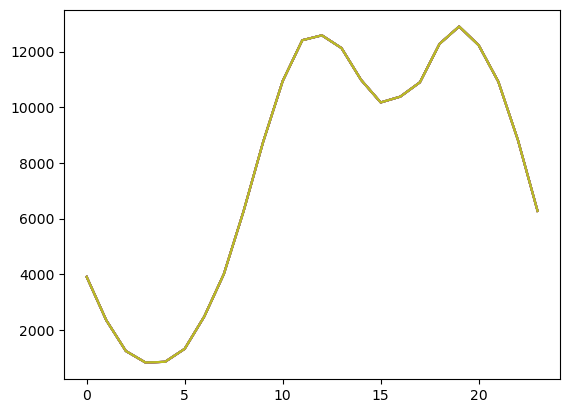

In [10]:
hours = [hour for hour, df in all_data.groupby('Hour')] #now it's in correct order
plt.plot(hours, all_data.groupby(['Hour']).count())
all_data.groupby(['Hour']).count()
#plt.show()

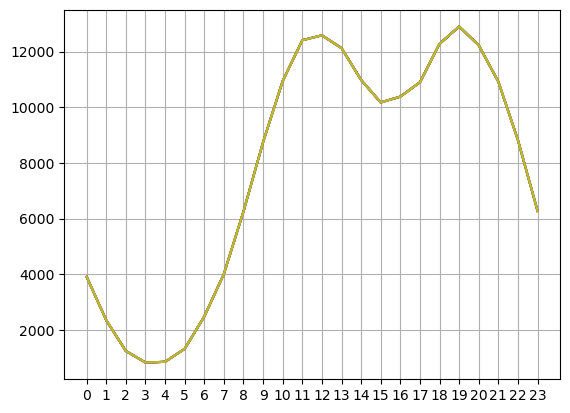

In [13]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

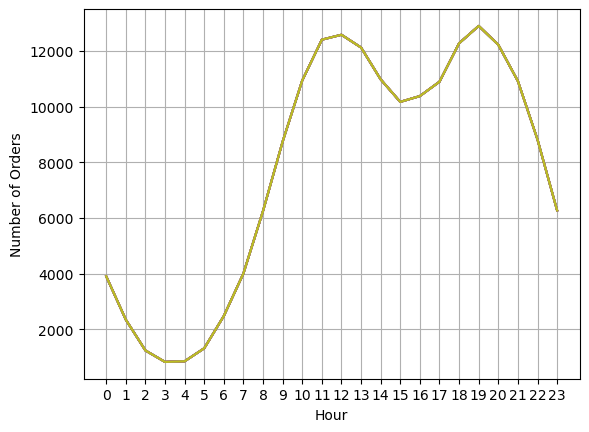

In [16]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

In [17]:
## My recommondation will be 11:00 am or 06:00 pm, because after these times the peak comes